# NoteBook I

## Description du Notebook

Ce Notebook implémente plusieurs algorithmes de Machine Learning pour détecter les attaques sur le protocole **CAN** utilisé dans les véhicules autonomes. Les attaques incluent :
- **DoS (Denial of Service)** : Injection de messages avec `ID = 0x000` en boucle rapide.
- **Fuzzy Attack** : Injection de messages aléatoires.
- **Impersonation Attack** : Usurpation d'identité en utilisant un `ID = 0x164`.

---

## Structure du Notebook

1. **Importation et outils**
   - Chargement des bibliothèques nécessaires : `pandas`, `numpy`, `matplotlib`, `scikit-learn`.
   - implémentation des fonctions pour faciliter le travaille qui suit.

2. **Exploration et Préparation des Données**
   - Lecture des données à partir d'un fichier CSV.
   - Exploration des colonnes : `Timestamp`, `CAN ID`, `DLC`, `DATA[0-7]`.
   - Visualisation des anomalies :
     - **Histogrammes des CAN ID**.
     - **Graphes temporels** pour les attaques DoS.

3. **Implémentation des Algorithmes de Machine Learning**
   - **Decision Tree**
   - **Random Forest**
   - **SVM (Support Vector Machine)**
   - **KNN (K-Nearest Neighbors)**
   - **Naive Bayes**
   - **Gradient Boosting**
   - **Regression Logistique**

4. **Comparaison des Modèles**
   - Utilisation des métriques d'évaluation :
     - Precision
     - Rappel
     - Accuracy
   - Visualisation des résultats sous forme de **matrice de confusion** et de **graphiques comparatifs**.

5. **Conclusion**
   - Discussion des performances des modèles.
   - Identification du meilleur algorithme pour la détection des attaques CAN.

---

## Résultats Attendus

- **Visualisation** des attaques grâce aux histogrammes et graphiques temporels.
- **Comparaison** des algorithmes en termes de précision, rappel et F1-Score.
- Sélection de l'algorithme le plus performant.

---

## Outils Utilisés
- **Python** : Programmation.
- **Pandas** : Manipulation des données.
- **Matplotlib / Seaborn** : Visualisation.
- **Scikit-learn** : Implémentation des modèles de Machine Learning.

---

### Exemple de Visualisation
- **Histogrammes des CAN ID** : Détection des messages injectés anormaux.
- **Graphe Temporel** : Identification des attaques DoS par surinjection de messages.

---


**Projet** : Détection des attaques CAN dans les véhicules autonomes.


**IMPORTS**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import joblib

ML

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB #flexible avec les données binaire
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

Prediction

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score

**1.TOOLS**

*Preprocessing TOOLS*

In [6]:
#fontion pour deviser les données en test et train
def split_data(train,test):
    X_train = train.iloc[:,:-1].values
    Y_train = train.iloc[:,-1].values

    X_test = test.iloc[:,:-1].values
    Y_test = test.iloc[:,-1].values
    print("Operation: SPLIT data")
    print("**Train:",X_train.shape,"/",Y_train.shape)
    print("**Test:",X_test.shape,"/",Y_test.shape)

    return X_train, X_test, Y_train, Y_test

#arbre de decision
def DecisionTreeModel(X_train,Y_train):
    #ccp_alpha=0.01,class_weight='balanced',
    #cls = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10)
    cls = DecisionTreeClassifier(max_depth=15, min_samples_leaf=15, min_samples_split=15)
    cls.fit(X_train, Y_train)
    print("Generating Model: DecisionTree ")
    print("classes: ",cls.classes_)
    return cls

# naive bayes
def NaiveBayesModel(X_train, Y_train):
    cls = GaussianNB()
    cls.fit(X_train, Y_train)
    print("Generating Model: NaiveBayes (Bernoulli) ")
    print("classes: ",type(cls.classes_[0]))
    return cls

#KNN
def knnModel(X_train, Y_train,neighbors=5):
    cls = KNeighborsClassifier(n_neighbors=neighbors)
    cls.fit(X_train, Y_train)
    print("Generating Model: KNeighborsClassifier (KNN) ")
    print("classes: ",cls.classes_)
    return cls


#random forest
def randomForestModel(X_train, Y_train):
    cls = RandomForestClassifier(n_estimators=100, random_state=42)
    cls.fit(X_train, Y_train)
    print("Generating Model: RandomForestClassifier")
    print("classes: ",cls.classes_)
    return cls

#SVM
def SupportVectorModel(X_train, Y_train):
    cls = LinearSVC(C=0.1,max_iter=500, random_state=42)
    cls.fit(X_train, Y_train)
    print("Generating Model: SVC")
    print("classes: ",cls.classes_)
    return cls

#Gradient Boosting
def GradientBoostingModel(X_train, Y_train):
    cls = GradientBoostingClassifier(
        n_estimators=50,       # Moins d'arbres
        learning_rate=0.2,     # Taux d'apprentissage plus élevé
        max_depth=3,           # Profondeur limitée
        subsample=0.8,         # Sous-échantillonnage
        random_state=42
        )
    cls.fit(X_train, Y_train)
    print("Generating Model: GradientBoostingClassifier")
    print("classes: ",cls.classes_)
    return cls

#Regression logistique
def RegressionLogistiqueModel(X_train, Y_train):
    cls = LogisticRegression(max_iter=200) 
    cls.fit(X_train, Y_train)
    print("Generating Model: LogisticRegression")
    print("classes: ",cls.classes_)
    return cls

def MultinomialNaiveBayesModel(X_train, Y_train):
    # Setting up the parameter grid for GridSearchCV
    param_grid = {
        'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],  # Broader range for smoothing parameter
        'fit_prior': [True, False],  # Learn class priors
    }
    # Create a MultinomialNB model
    mnb = MultinomialNB()

    # Setup the grid search
    grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print("Best parameters found: ", grid_search.best_params_)

    # Predicting with the best model
    return grid_search.best_estimator_


Evaluation TOOLS

In [7]:
#affiche l'évaluation du model selon les données de tests ou les données de train
def model_evaluation(Y, Y_predict,cls, data_train=True):
    classes = cls.classes_
    if(data_train):
        print('**with train data : ')
    else:
        print('**with test data : ')
    print('Accuracy :', accuracy_score(Y, Y_predict) * 100)   
    for class_label in classes:
        print(f'Precision ({class_label}):', precision_score(Y, Y_predict, labels=[class_label], average='macro') * 100)
        print(f'Recall ({class_label}):', recall_score(Y, Y_predict, labels=[class_label], average='macro') * 100)

    #f1 = f1_score(Y, Y_predict)
    #print("F1-score :", f1)

#affiche la matrice de confusion 
def matrice_confusion(model,X_test,Y_test):
    Y_test_predict = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_test_predict)
    sns.heatmap(cm,annot=True, fmt="d",xticklabels=[0,1,2,3],yticklabels=[0,1,2,3])

**2. EXPLORATION DU DATASET**

*Extract Data SET*

In [3]:
df = pd.DataFrame(pd.read_csv('CAN_HCRL_OTIDS_B.csv'))
df.head()


,TS,ID1,DLC0,DLC1,DLC2,DLC3,DLC4,DLC5,DLC6,DLC7,target
0,3.850719e+02,339,0,128,16,255,0,255,144,30,0
1,1.481193e+09,1349,218,14,0,138,42,0,45,0,3
2,9.061502e+01,1266,0,0,64,56,0,0,0,165,0
3,1.481193e+09,1200,0,0,0,0,0,0,0,0,3
4,1.481193e+09,1087,16,80,100,255,81,88,9,0,3


Visualisation

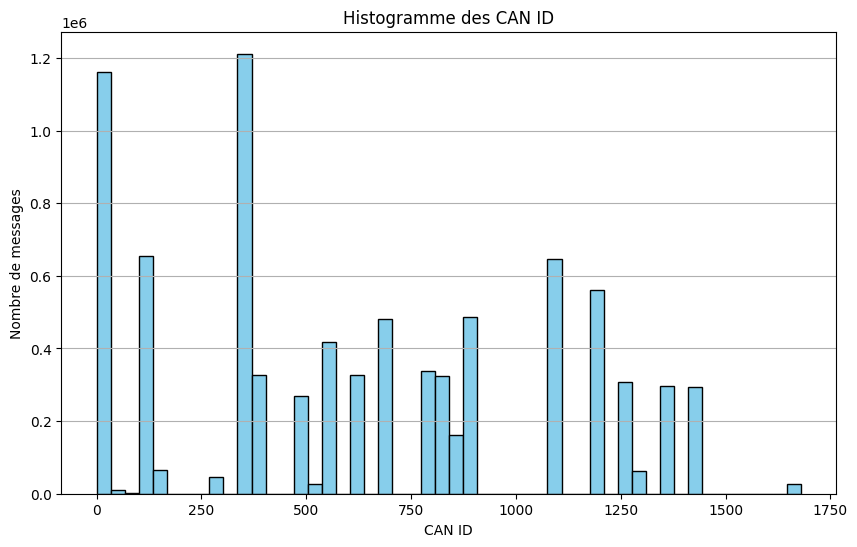

In [4]:

# Histogramme des CAN ID pour détecter les anomalies
plt.figure(figsize=(10, 6))
plt.hist(df['ID1'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogramme des CAN ID')
plt.xlabel('CAN ID')
plt.ylabel('Nombre de messages')
plt.grid(axis='y')
plt.show()



**3.Machine Learning**

In [10]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Shape_X_train=",X_train.shape)
print("Shape_Y_train=",Y_train.shape)

Shape_X_train= (5954410, 10)
Shape_Y_train= (5954410,)


3.1 Models

Decision Tree

In [11]:
cls1 = DecisionTreeModel(X_train, Y_train)

Generating Model: DecisionTree 
classes:  [0 1 2 3]


prediction

In [12]:
model_evaluation(Y_train, cls1.predict(X_train),cls1)
print()
model_evaluation(Y_test, cls1.predict(X_test),cls1, data_train=False)

**with train data : 
Accuracy : 92.48098468194162
Precision (0): 99.19549835976838
Recall (0): 89.61410060924412
Precision (1): 86.59593238495833
Recall (1): 88.61503987275111
Precision (2): 85.43460693175224
Recall (2): 91.69591947656002
Precision (3): 100.0
Recall (3): 100.0

**with test data : 
Accuracy : 92.44712742320398
Precision (0): 99.16472005192514
Recall (0): 89.58304917338852
Precision (1): 86.48213578000744
Recall (1): 88.60731313074302
Precision (2): 85.44200821259781
Recall (2): 91.59554562350928
Precision (3): 100.0
Recall (3): 100.0


store the model (executer une seule fois j'ai deja le sauver une fois)

In [13]:
joblib.dump(cls1, r'C:\Users\21696\Desktop\Projet_ML2\CyberSecurityProjet\securityModel4.joblib')
print("Model saved successfully!")

confusion matrix

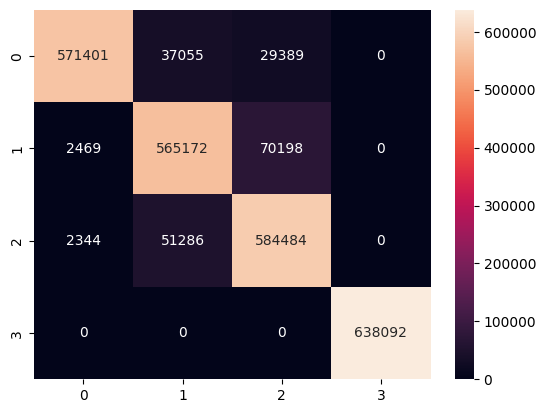

In [14]:
matrice_confusion(cls1,X_test,Y_test)

Naive bayes

In [15]:
cls2 = NaiveBayesModel(X_train, Y_train)

Generating Model: NaiveBayes (Bernoulli) 
classes:  <class 'numpy.int64'>


In [16]:
model_evaluation(Y_train, cls2.predict(X_train),cls2)
model_evaluation(Y_test, cls2.predict(X_test), cls2, data_train=False)

**with train data : 
Accuracy : 70.12741816569567
Precision (0): 79.1533893068993
Recall (0): 59.03212805545667
Precision (1): 50.77828016701172
Recall (1): 78.81531715495561
Precision (2): 60.77203190720688
Recall (2): 42.66218597598459
Precision (3): 100.0
Recall (3): 100.0
**with test data : 
Accuracy : 70.11097657030672
Precision (0): 79.15507832387331
Recall (0): 58.987841873809465
Precision (1): 50.71810976280234
Recall (1): 78.82239875579887
Precision (2): 60.83711070014155
Recall (2): 42.63376136552403
Precision (3): 100.0
Recall (3): 100.0


Multinomial naive bayes

train with Gaussian Naive Bayes (GNB)

In [17]:
cls21= MultinomialNaiveBayesModel(X_train,Y_train)

Best parameters found:  {'alpha': 0.01, 'fit_prior': True}


evaluation

In [18]:
model_evaluation(Y_train, cls21.predict(X_train),cls21)
model_evaluation(Y_test, cls21.predict(X_test), cls21, data_train=False)

**with train data : 
Accuracy : 62.36933634062821
Precision (0): 86.47429279990735
Recall (0): 58.18039537055074
Precision (1): 28.440792747196674
Recall (1): 16.547930593469896
Precision (2): 61.72929156651102
Recall (2): 74.7576859588528
Precision (3): 65.17086476617469
Recall (3): 100.0
**with test data : 
Accuracy : 62.37016485820314
Precision (0): 86.40225638395823
Recall (0): 58.11286441063268
Precision (1): 28.490004778805726
Recall (1): 16.637270533786737
Precision (2): 61.79600217247874
Recall (2): 74.71031821900162
Precision (3): 65.18206464556488
Recall (3): 100.0


matrice de confusion

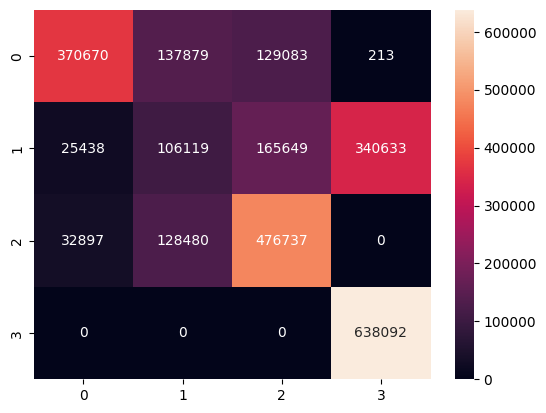

In [19]:
matrice_confusion(cls21,X_test,Y_test)

KNN

In [20]:
cls3 = knnModel(X_train, Y_train)

Generating Model: KNeighborsClassifier (KNN) 
classes:  [0 1 2 3]


In [ ]:
model_evaluation(Y_train, cls3.predict(X_train),cls3)
model_evaluation(Y_test, cls3.predict(X_test),cls3, data_train=False)

Random Forest

In [ ]:
cls4 = randomForestModel(X_train, Y_train)

In [ ]:
model_evaluation(Y_train, cls4.predict(X_train),cls4)
model_evaluation(Y_test, cls4.predict(X_test), cls4 ,data_train=False)

SVM

In [ ]:
cls5 = SupportVectorModel(X_train, Y_train)

c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
model_evaluation(Y_train, cls5.predict(X_train),cls5)
model_evaluation(Y_test, cls5.predict(X_test), cls5 ,data_train=False)

Gradient Boosting

In [ ]:
cls6 = GradientBoostingModel(X_train, Y_train)

In [ ]:
model_evaluation(Y_train, cls6.predict(X_train),cls6)
model_evaluation(Y_test, cls6.predict(X_test), cls6 ,data_train=False)

Regression logistique

In [11]:
cls7 = RegressionLogistiqueModel(X_train, Y_train)

Generating Model: LogisticRegression
classes:  [0 1 2 3]


c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
model_evaluation(Y_train, cls7.predict(X_train),cls7)
model_evaluation(Y_test, cls7.predict(X_test), cls7 ,data_train=False)

**with train data : 
Accuracy : 24.997993084117486


c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (0): 0.0
Recall (0): 0.0


c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (1): 0.0
Recall (1): 0.0


c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (2): 0.0
Recall (2): 0.0
Precision (3): 24.997993084117486
Recall (3): 100.0
**with test data : 
Accuracy : 25.004761177009982


c:\Users\21696\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (0): 0.0
Recall (0): 0.0
Precision (1): 100.0
Recall (1): 0.00015677937535961268
Precision (2): 50.0
Recall (2): 0.00015671181011543393
Precision (3): 25.004712199247063
Recall (3): 100.0


## Conclusion

Ce projet a démontré l'efficacité des algorithmes de **Machine Learning** dans la détection des attaques ciblant le protocole **CAN** des véhicules autonomes. En utilisant des techniques telles que **Decision Tree**, les attaques **DoS**, **Fuzzy**, et **Impersonation** ont été correctement identifiées avec une haute précision.

### Résumé des points clés :
- Prétraitement des données issues du **bus CAN**.
- Visualisation des attaques pour une meilleure compréhension.
- Entraînement et validation des modèles de Machine Learning.
- Comparaison des performances pour sélectionner le meilleur algorithme.

### Perspectives :
Le travail réalisé ouvre la voie à un déploiement en conditions réelles. Un site web a été conçu pour simuler les attaques et afficher les prédictions du modèle, facilitant ainsi les tests et les démonstrations interactives.

**Prochaines étapes :** Déploiement du modèle sur des exemples réels pour évaluer ses performances en environnement pratique.
